In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Понимание что такое производные

In [2]:
def f(x):
    # 6x - 4
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [4]:
np.array(10)

array(10)

In [5]:
xs = np.arange(-5, 5, 0.5)
xs

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [6]:
ys = f(xs)
ys

array([100.  ,  83.75,  69.  ,  55.75,  44.  ,  33.75,  25.  ,  17.75,
        12.  ,   7.75,   5.  ,   3.75,   4.  ,   5.75,   9.  ,  13.75,
        20.  ,  27.75,  37.  ,  47.75])

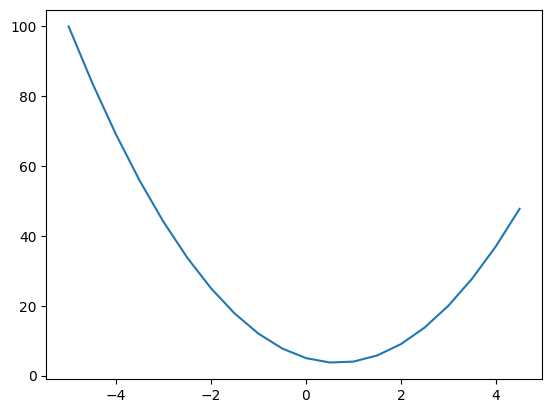

In [7]:
plt.plot(xs, ys)

Производная функция в точке - уровнение прямой описывающей касательную в этой точке. Описывается насколько изменится целевая функция при бесконечно малом изменении входящей в нее переменной (slope)

![image.png](attachment:9a0de267-08b5-442c-8381-9dd5c7379323.png)

In [8]:
h = 0.0001
x = 3.0
print(f(x))
print(f(x + h))
print((f(x + h) - f(x))/ h)

20.0
20.001400030000006
14.000300000063248


In [9]:
h = 0.0001
x = -3.0
print(f(x))
print(f(x + h))
print((f(x + h) - f(x))/ h)

44.0
43.99780002999999
-21.999700000066014


In [10]:
h = 0.0001
x = 2/3
print(f(x))
print(f(x + h))
print((f(x + h) - f(x))/ h)

3.666666666666667
3.666666696666667
0.0002999999981767587


In [11]:
# Немного усложняем, добавляем больше переменных

a = 2.0
b = -3.0
c = 10

d = a*b + c
print(d)

4.0


Смотрим на прооизводные d по отношению к a b c

In [12]:
h = 0.0001

a = 2.0
b = -3.0
c = 10

d1 = a*b + c
a += h
d2 = a*b + c

# ТК a - положительное число, умножаемое на b, негативное, то при умножении a мы будем получать чуть более негативное произведение, а значит результат уменьшится. отсюда slope - отрицательный
print(d1)
print(d2)
print(f'Slope: {(d2 - d1) / h} ')

4.0
3.999699999999999
Slope: -3.000000000010772 


In [13]:
h = 0.0001

a = 2.0
b = -3.0
c = 10

d1 = a*b + c
b += h
d2 = a*b + c

# ТК b - отрицательное число, умножаемое на положительное, увеличив его мы увеличим значение произведения и итоговой суммы, таким образом slope будет положительным
print(d1)
print(d2)
print(f'Slope: {(d2 - d1) / h} ')

4.0
4.0002
Slope: 2.0000000000042206 


In [14]:
h = 0.0001

a = 2.0
b = -3.0
c = 10

d1 = a*b + c
c += h
d2 = a*b + c

# Тут slope примерно равен 1
print(d1)
print(d2)
print(f'Slope: {(d2 - d1) / h} ')

4.0
4.0001
Slope: 0.9999999999976694 


### Создание объекта Value который будет хранить в себе значения, градиенты, и все прочее для работы нейросети

In [15]:
class Value:
    def __init__(self, data):
        self.data = data

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: {self.data}'

    def __add__(self, other):
        out = self.data + other.data
        return Value(out)

    def __mul__(self, other):
        out = self.data * other.data
        return Value(out)

In [16]:
a = Value(2.0)
# Выводится благодаря магическому методу __repr__
# вызывает __repr__ или __str__
a

Value: 2.0

In [17]:
b = Value(-3.0)

In [18]:
# Суммируются через __add__, + обертка вокруг __add__
a + b

Value: -1.0

In [19]:
a.__add__(b)

Value: -1.0

In [20]:
# Перемножаются через __mul__
a * b

Value: -6.0

In [21]:
c = Value(10.0)
a * b + c

Value: 4.0

In [22]:
(a.__mul__(b)).__add__(c)

Value: 4.0

### Теперь нужно реализовать граф вычислений

In [23]:
class Value:
    def __init__(self, data, _children=()):
        self.data = data
        self._prev = set(_children)

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'
    def __add__(self, other):
        out = Value(data=(self.data + other.data), _children=(self, other))
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data), _children=(self, other))
        return out

In [24]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a * b + c

# Значения использованные для создания хранятся, но не хранятся операции
d._prev

{Value: data=(-6.0), Value: data=(10.0)}

In [25]:
class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(data=(self.data + other.data),
                    _children=(self, other),
                    _op='+')
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data),
                    _children=(self, other),
                    _op='*')
        return out

In [26]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a * b + c

# Значения использованные для создания хранятся, но не хранятся операции
print(d._prev)
print(d._op)

{Value: data=(-6.0), Value: data=(10.0)}
+


Функция для визуазизации графов вычислений

In [27]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        # dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        dot.node(name=str(id(n)), label = "{ data %.4f  }"%(n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

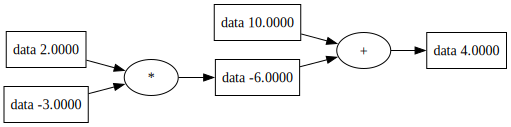

In [28]:
draw_dot(d)

### Добавляю label чтобы лучше видеть что есть что

In [29]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(data=(self.data + other.data),
                    _children=(self, other),
                    _op='+',
                    label='{} + {}'.format(self.label, other.label))
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data),
                    _children=(self, other),
                    _op='*',
                    label='{} * {}'.format(self.label, other.label))
        return out

In [30]:
a = Value(2.0, label='a')
b = Value(3.0, label='b')
c = Value(3.0, label='c')

d = a * b + c

# Значения использованные для создания хранятся, но не хранятся операции
print(d._prev)
print(d._op)

{Value: data=(3.0), Value: data=(6.0)}
+


In [31]:
print(a.label)
print(b.label)
print(c.label)
print(d.label)

a
b
c
a * b + c


Реализую чуть другие лейблы

In [32]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(data=(self.data + other.data),
                    _children=(self, other),
                    _op='+')
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data),
                    _children=(self, other),
                    _op='*')
        return out

In [33]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0, label='f')
L = d * f
L.label = 'L'

# Значения использованные для создания хранятся, но не хранятся операции
print(d._prev)
print(d._op)

{Value: data=(10.0), Value: data=(-6.0)}
+


In [34]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        # dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        dot.node(name=str(id(n)), label = "{%s | data %.4f  }"%(n.label, n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

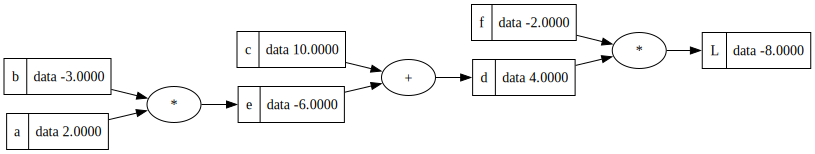

In [35]:
# Визуализация forward pass
draw_dot(L)

### Начигаю вычисление BackProp

Добавляю grad для хранения производных

In [36]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(data=(self.data + other.data),
                    _children=(self, other),
                    _op='+')
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data),
                    _children=(self, other),
                    _op='*')
        return out

In [37]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        # dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        dot.node(name=str(id(n)), label = "{%s | data %.4f | grad %.4f }"%(n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [38]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0, label='f')
L = d * f
L.label = 'L'

# Значения использованные для создания хранятся, но не хранятся операции
print(d._prev)
print(d._op)

{Value: data=(10.0), Value: data=(-6.0)}
+


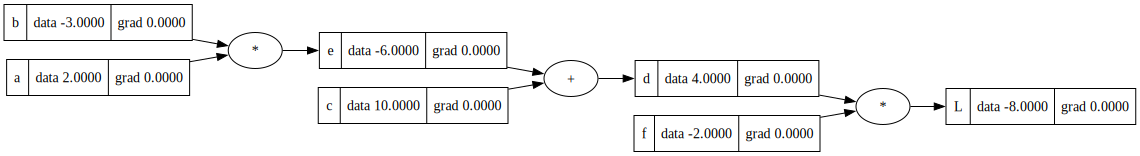

In [39]:
draw_dot(L)

Примитивный способ вычисления градиентов

In [43]:
def lol():

    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'

    L1 = L.data

    a = Value(2.0  + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data

    deriv = (L2 - L1) / h
    print(deriv)

In [44]:
lol()

6.000000000021544


L = d * f

dL / dd = f

dL / df = d

In [48]:
f.grad = 4.0
d.grad = -2.0
L.grad = 1.0

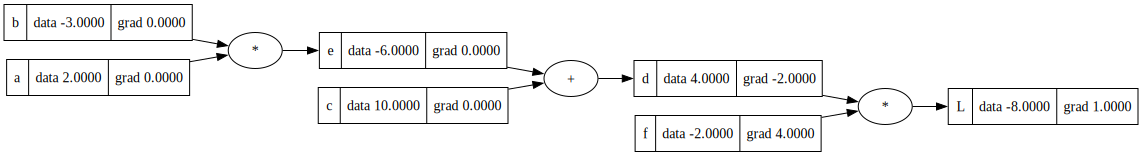

In [51]:
L.label = 'L'
draw_dot(L)

# Если понять градиент для этого узла, то поймешь backprop (обратное распространение ошибки через градиенты) для всех узлов и всех нейросетей

<b> The Chain Rule </b>

If a variable z depends on the variable y, which itself depends on the variable x (that is, y and z are dependent variables), then z depends on x as well, via the intermediate variable y.

As put by George F. Simmons: "If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."

https://en.wikipedia.org/wiki/Chain_rule

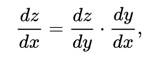
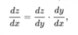

dL / dc = (dL / dd) * (dd / dc)

dL / da = (dL / dd) * (dd / de) * (de / da)

Вот таким вот образом ошибка распространяется назад на всю глубину нейросети

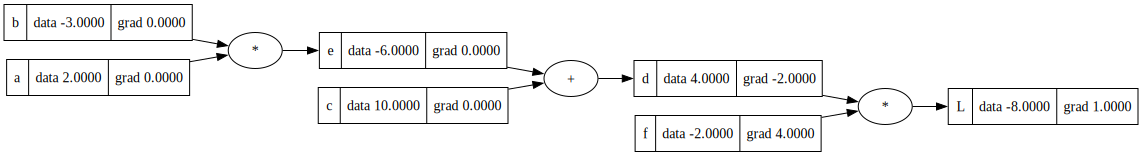

In [52]:
L.label = 'L'
draw_dot(L)

In [53]:
# Все можно вычислить проверить через функцию lol(), добавляя h к этим переменным, но у меня почему-то jupyter визуализация ломается от нее
c.grad = -2
e.grad = -2

In [54]:
b.grad = -4
a.grad = 6

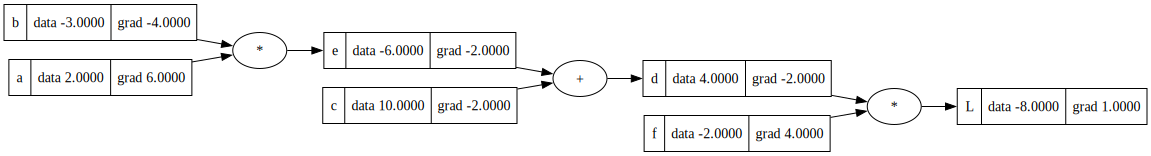

In [55]:
L.label = 'L'
draw_dot(L)

### Реализация оптимизации

In [58]:
lr = 0.001

a.data += lr * a.grad
b.data += lr * b.grad
c.data += lr * c.grad
# d.data += lr * d.grad
# e.data += lr * e.grad
f.data += lr * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.928064095999999


### На примере обновления весов нейрона

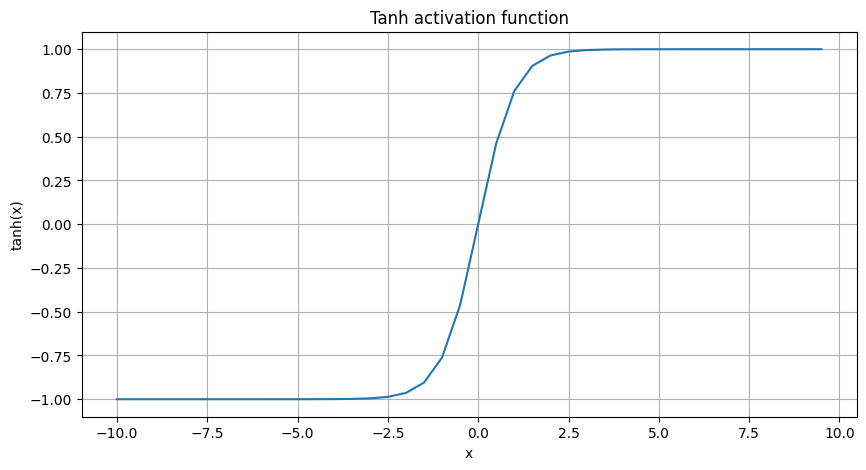

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(-10, 10, 0.5), np.tanh(np.arange(-10, 10, 0.5)))
plt.title('Tanh activation function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid()

In [73]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Веса нейрона
w1 = Value(10.0, label='w1')
w2 = Value(5.0, label='w2')
# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

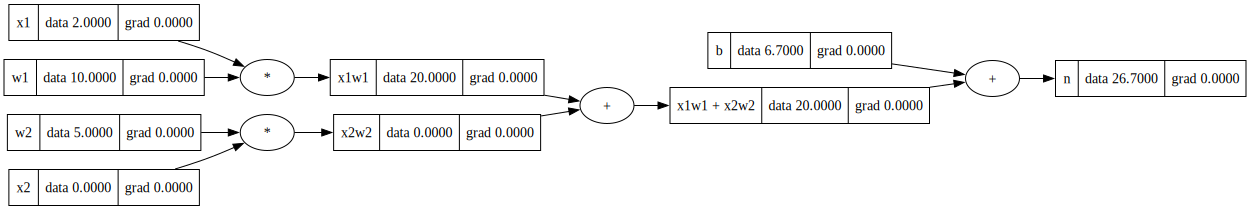

In [74]:
draw_dot(n)

In [75]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(data=(self.data + other.data),
                    _children=(self, other),
                    _op='+')
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data),
                    _children=(self, other),
                    _op='*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(data=t, _children=(self, ), label='tanh')
        return out


In [82]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')

# Веса нейрона
w1 = Value(1.0, label='w1')
w2 = Value(-3.0, label='w2')
# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()

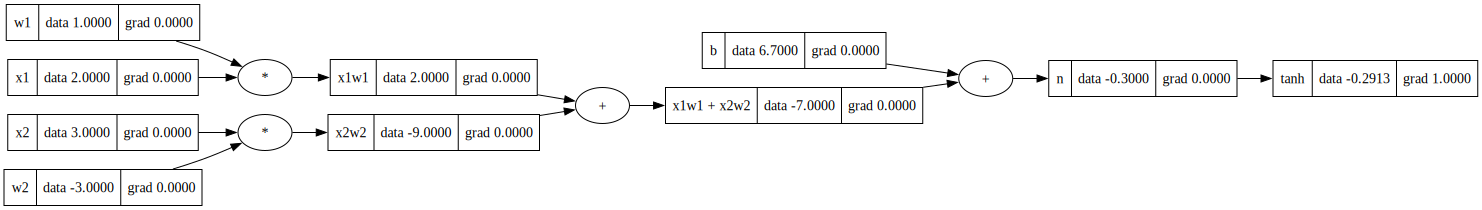

In [85]:
draw_dot(o)

In [84]:
o.grad = 1.0

In [ ]:
# o = tanh(n)
# Производную для функции можно вывести / посмотреть в инете
# Производная для tanh
# do / dn = 1 - tanh(n)**2 = 1 - o**2

In [88]:
n.grad = 1 - o.data ** 2
n.grad

0.9151369618266293

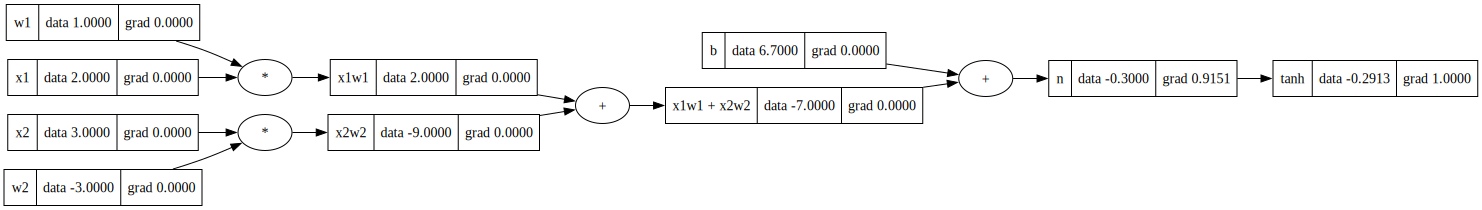

In [90]:
draw_dot(o)

In [91]:
# ТК след операция просто сложение, то градиент остается таким же как у предыдущего узла

x1w1x2w2.grad = n.grad
b.grad = n.grad

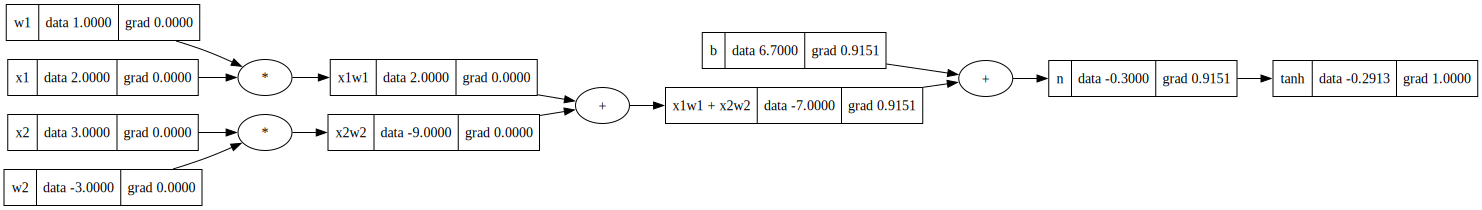

In [92]:
draw_dot(o)

In [93]:
# Опять операция сложения

x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

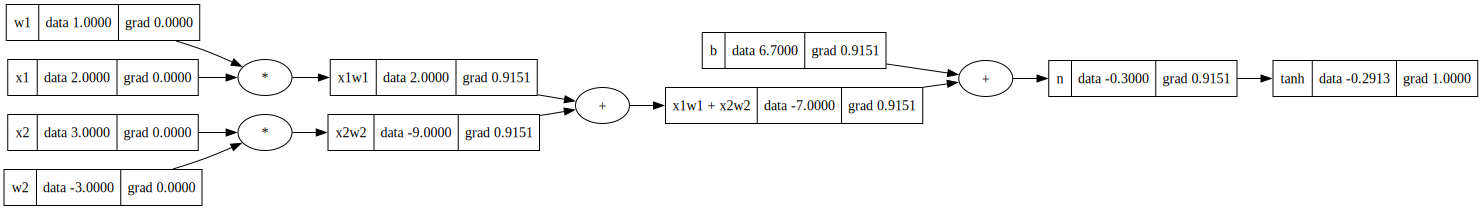

In [94]:
draw_dot(o)

In [95]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

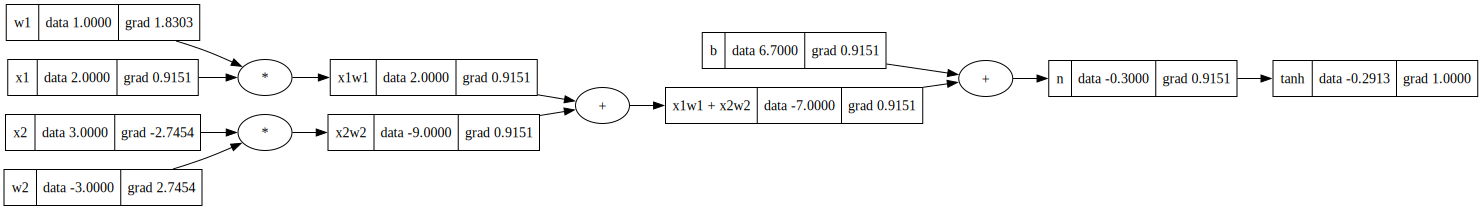

In [96]:
draw_dot(o)

#### Для того чтобы вычислить градиент в точке не надо знать далеко находящиеся градиенты, достаточно градиента след узла, и значений на этом узле. Градиенты далее идущего узла уже содержат информацию о влиянии на все последующие узлы

#### Прописываю механизм backprop для объекта Value

In [131]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    #  representation — «представление». Без него в print и выводах будет всякая шляпа
    # __repr__ — это метод, который возвращает официальное строковое представление объекта
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(data=(self.data + other.data),
                    _children=(self, other),
                    _op='+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data),
                    _children=(self, other),
                    _op='*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(data=t, _children=(self, ), label='tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

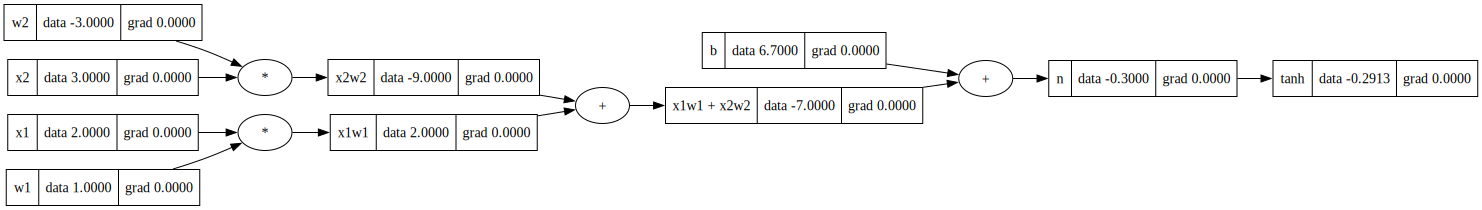

In [140]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')

# Веса нейрона
w1 = Value(1.0, label='w1')
w2 = Value(-3.0, label='w2')
# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
draw_dot(o)

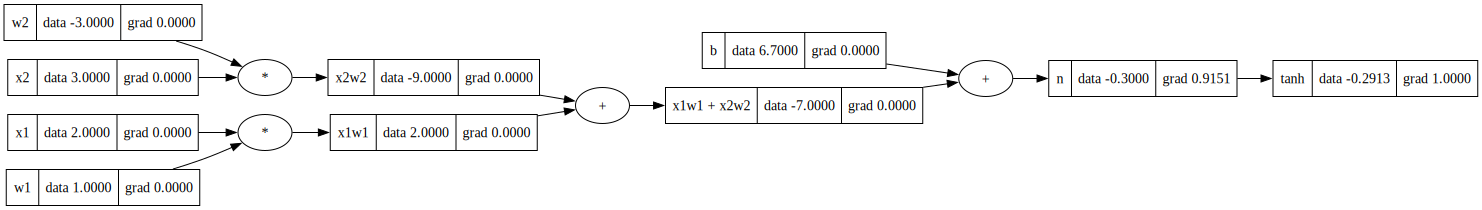

In [141]:
o.grad = 1.0
o._backward()
draw_dot(o)

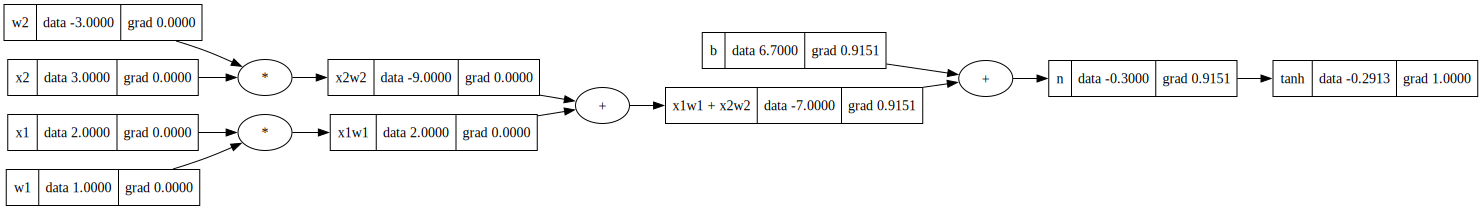

In [142]:
n._backward()
draw_dot(o)

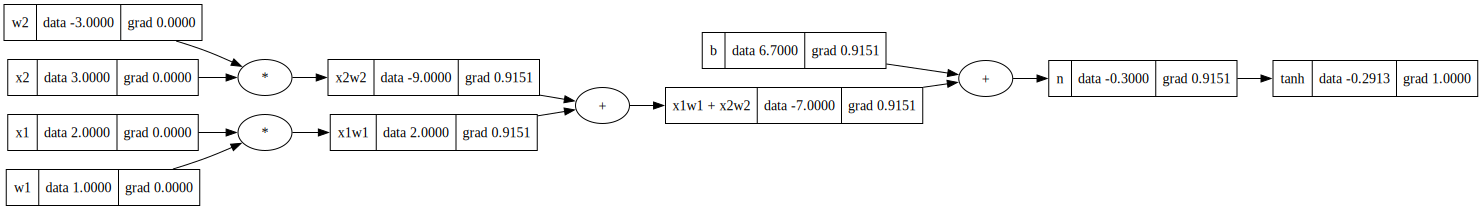

In [143]:
x1w1x2w2._backward()
draw_dot(o)

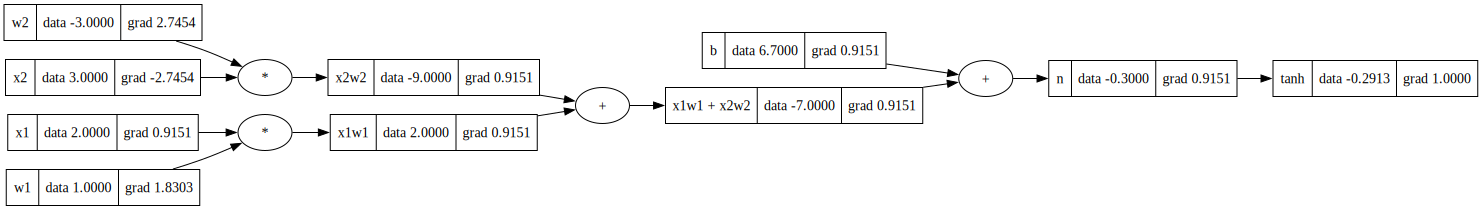

In [144]:
x1w1._backward()
x2w2._backward()
draw_dot(o)

### Автоматизация вызова _backward

Topological sort - сортировка чтобы идти только справа налево

https://en.wikipedia.org/wiki/Topological_sorting

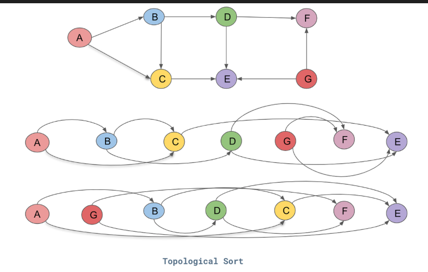

In [145]:
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        # Добавит тебя только после того как все твои chilren были занесены
        topo.append(v)
build_topo(o)
topo

[Value: data=(6.7),
 Value: data=(3.0),
 Value: data=(-3.0),
 Value: data=(-9.0),
 Value: data=(2.0),
 Value: data=(1.0),
 Value: data=(2.0),
 Value: data=(-7.0),
 Value: data=(-0.2999999999999998),
 Value: data=(-0.2913126124515908)]

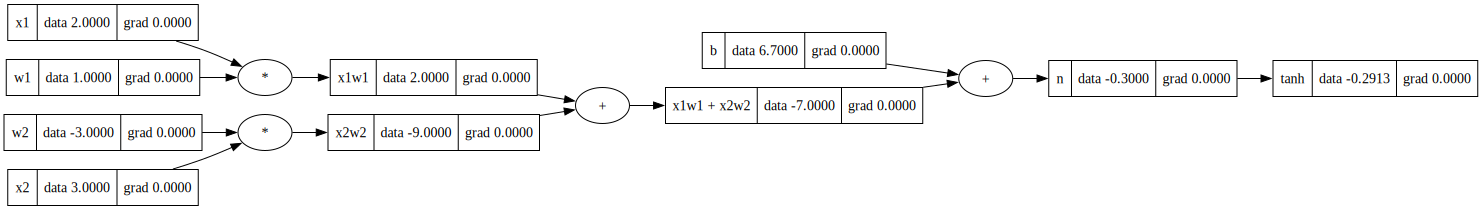

In [149]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')

# Веса нейрона
w1 = Value(1.0, label='w1')
w2 = Value(-3.0, label='w2')
# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
draw_dot(o)

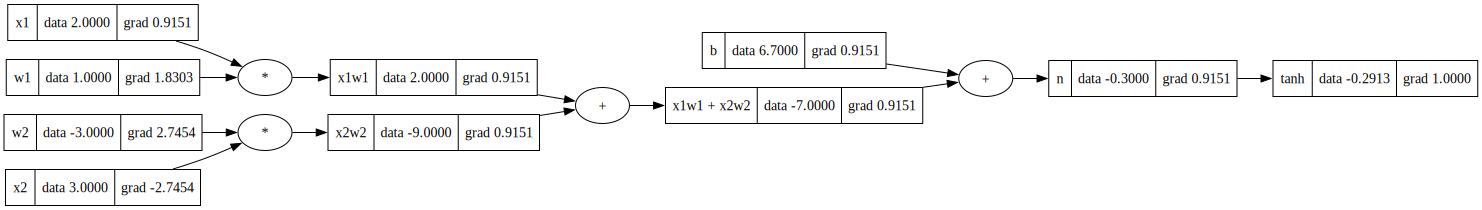

In [150]:
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        # Добавит тебя только после того как все твои chilren были занесены
        topo.append(v)
build_topo(o)

o.grad = 1.0
for node in reversed(topo):
    node._backward()

draw_dot(o)

### Переношу логику backward в Value

In [153]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # representation — «представление»
    def __repr__(self):
        return f'Value: data=({self.data})'

    def __add__(self, other):
        out = Value(
            data=(self.data + other.data),
            _children=(self, other),
            _op='+'
        )

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(
            data=(self.data * other.data),
            _children=(self, other),
            _op='*'
        )

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        out = Value(data=t, _children=(self,), label='tanh')

        def _backward():
            self.grad = (1 - t ** 2) * out.grad

        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                # добавляем после всех детей
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

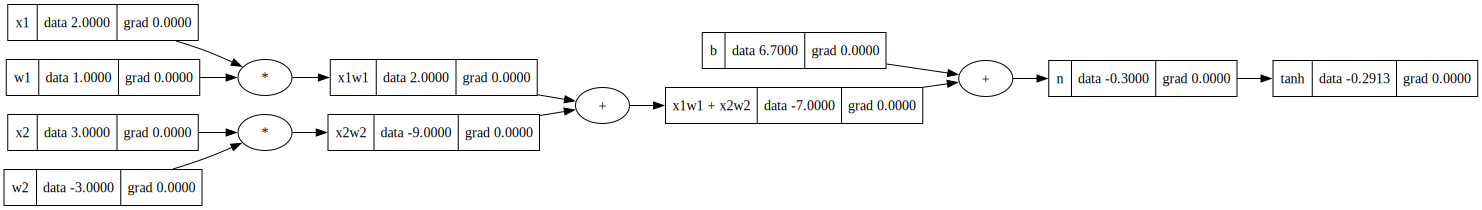

In [154]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(3.0, label='x2')

# Веса нейрона
w1 = Value(1.0, label='w1')
w2 = Value(-3.0, label='w2')
# Bias
b = Value(6.7, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
draw_dot(o)

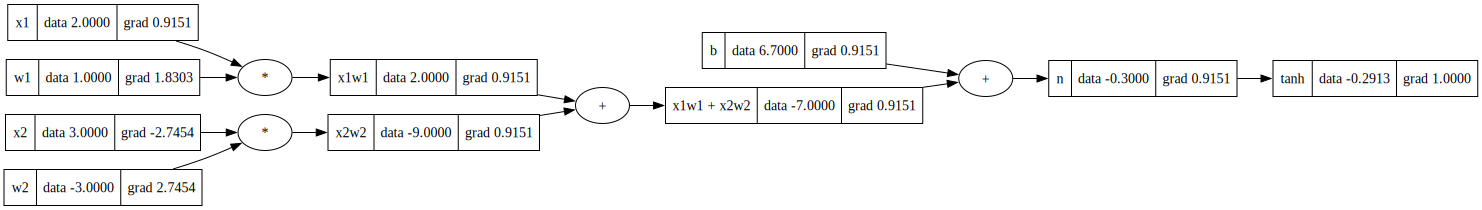

In [155]:
o.backward()
draw_dot(o)
